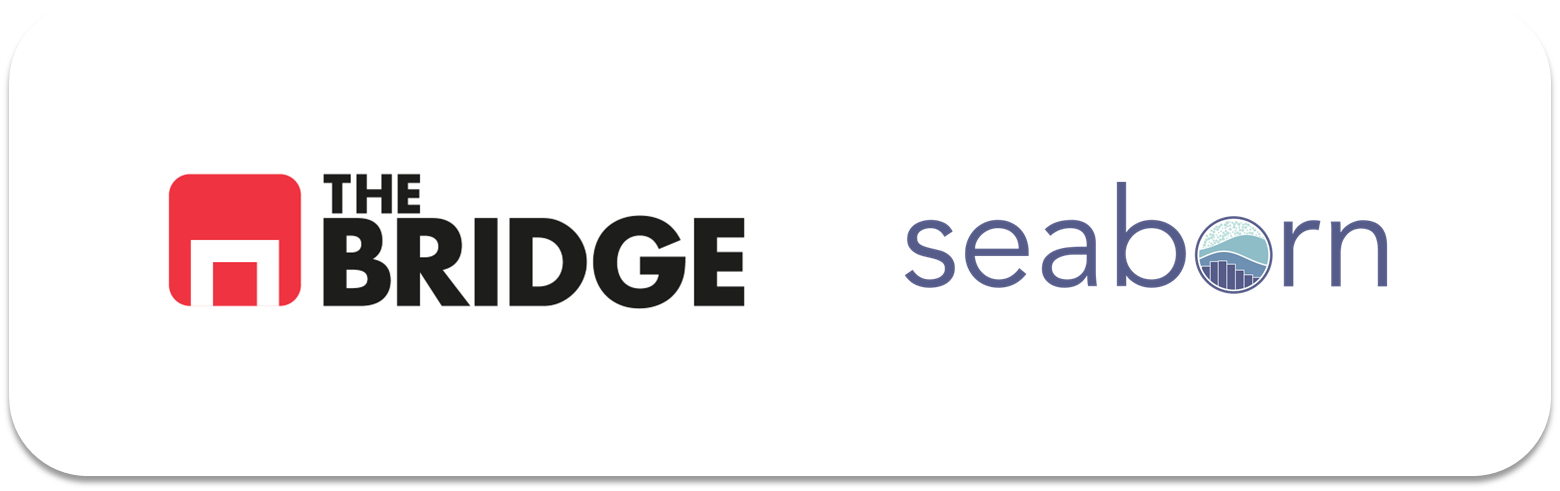

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [4]:
df = pd.read_csv("/home/adria/Ejercicios/03_Analisis_de_Datos/Sprint_08/Unidad_02/Practica_Obligatoria/data/california_cities.csv")
df.head()


,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [5]:
df_limpio = df.dropna()

### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [7]:
def diagrama_dispersion(df, col_x, col_y, col_color=None, tamano='auto', escala=1.0, usar_colorbar=False):
    plt.figure(figsize=(10, 7))
    
    # Determinar tamaño de los puntos
    if isinstance(tamano, str) and tamano in df.columns:
        tamanos = df[tamano] * escala
    else:
        tamanos = tamano  # fijo

    # Graficar
    scatter = None
    if col_color is not None:
        scatter = plt.scatter(data=df, x=col_x, y=col_y,
                              c=df[col_color], s=tamanos, cmap='viridis', alpha=0.7)
        if usar_colorbar:
            plt.colorbar(scatter, label=col_color)
        else:
            plt.legend(*scatter.legend_elements("colors"), title=col_color)
    else:
        plt.scatter(data=df, x=col_x, y=col_y, s=tamanos, alpha=0.7)

    # Si el tamaño es variable y numérico, podemos añadir leyenda para tamaños
    if isinstance(tamano, str) and tamano in df.columns:
        handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
        plt.legend(handles, labels, title="Tamaño")

    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.title(f"{col_y} vs {col_x}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

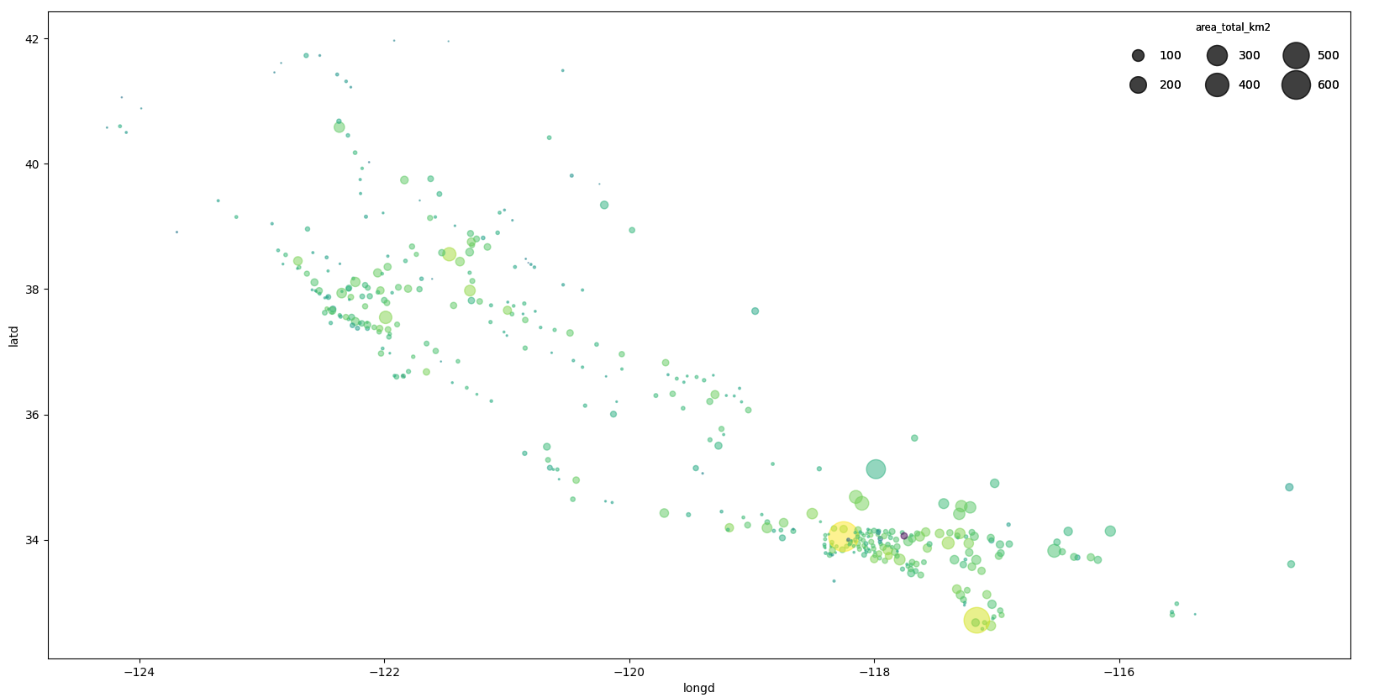

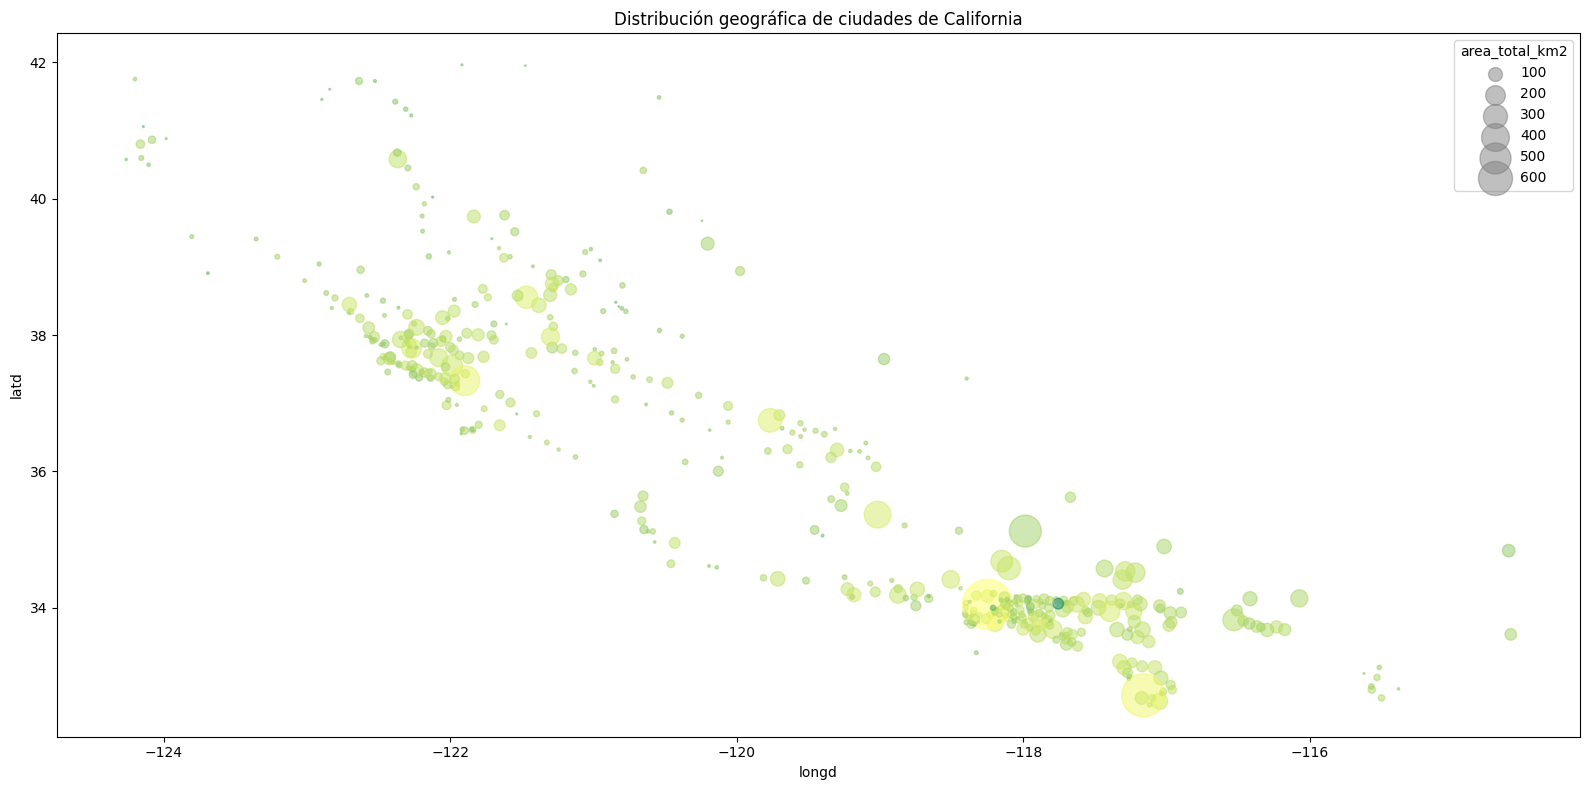

In [10]:
# Crear columna de logaritmo decimal de la población
df["log_poblacion"] = np.log10(df["population_total"])

# Crear el gráfico
plt.figure(figsize=(16, 8))

# Puntos (círculos) coloreados por log_poblacion, tamaño por área total
plt.scatter(
    df["longd"], df["latd"],
    s=df["area_total_km2"],
    c=df["log_poblacion"],
    cmap="summer",
    alpha=0.5
)

# Crear leyenda manual de tamaños
for size in [100, 200, 300, 400, 500, 600]:
    plt.scatter([], [], s=size, color="gray", alpha=0.5, label=f"{size}")

plt.legend(title="area_total_km2", loc="upper right", scatterpoints=1)

# Etiquetas
plt.xlabel("longd")
plt.ylabel("latd")
plt.title("Distribución geográfica de ciudades de California")

plt.tight_layout()
plt.show()

## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

In [11]:
# Cargar el dataset del Titanic
df_titanic = pd.read_csv("/home/adria/Ejercicios/03_Analisis_de_Datos/Sprint_08/Unidad_02/Practica_Obligatoria/data/titanic.csv")

# Verificar columnas y tipos
info = df_titanic.info()
primeras_filas = df_titanic.head()

# Ajustar a nombres de columnas en minúsculas
df_titanic.columns = df_titanic.columns.str.lower()

# Repetimos análisis con los nombres corregidos
tasa_mortalidad = 1 - df_titanic["survived"].mean()

# Añadir columna que indica si es niño
df_titanic["child"] = df_titanic["age"] < 18

# Supervivencia por sexo y por edad (niños)
supervivencia_sexo = df_titanic.groupby("sex")["survived"].mean()
supervivencia_niños_vs_adultos = df_titanic.groupby("child")["survived"].mean()

# Supervivencia por clase
supervivencia_clase = df_titanic.groupby("pclass")["survived"].mean()

# Supervivencia por clase y sexo
supervivencia_clase_sexo = df_titanic.groupby(["pclass", "sex"])["survived"].mean().unstack()

# Supervivencia por puerto de embarque
supervivencia_embarque = df_titanic.groupby("embarked")["survived"].mean()

# Distribución de clases por puerto de embarque
clase_por_embarque = df_titanic.groupby("embarked")["pclass"].value_counts(normalize=True).unstack()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


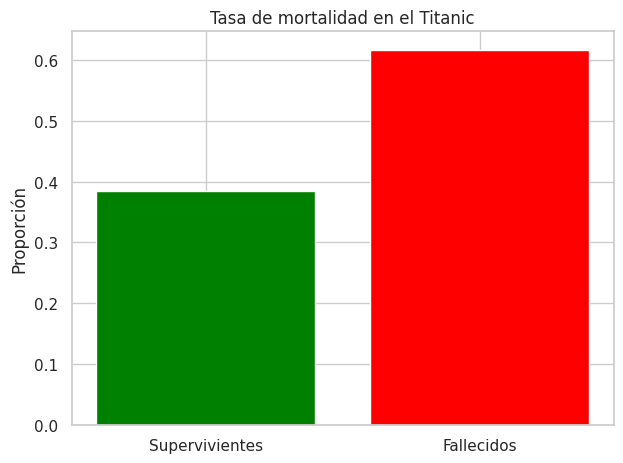

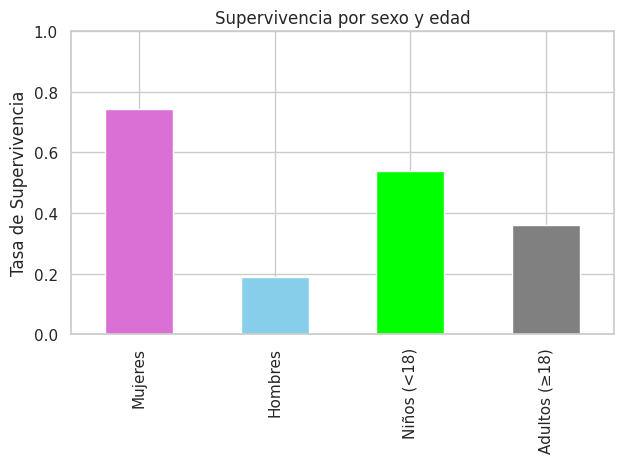

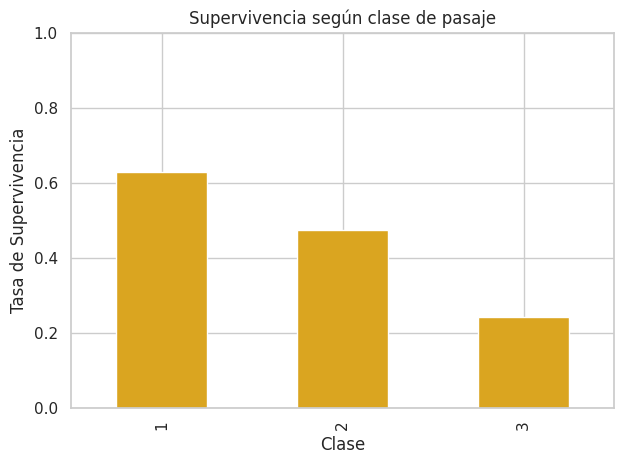

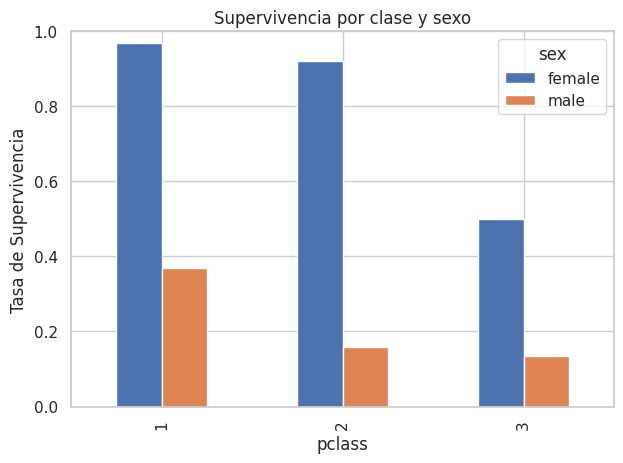

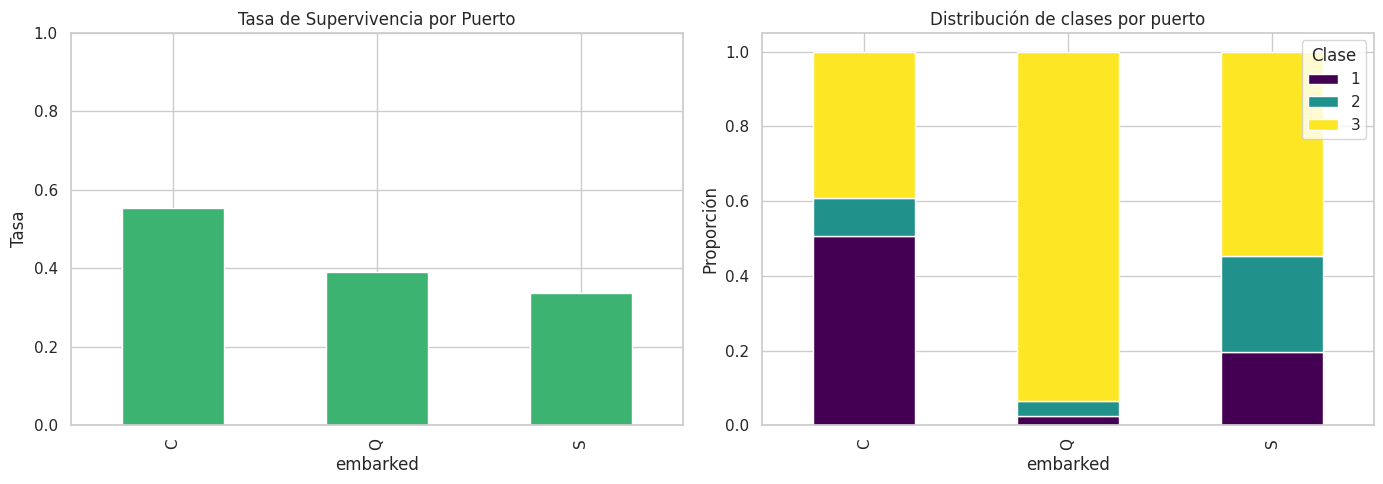

In [12]:
# Estilo general
sns.set(style="whitegrid")

# Slide 1: Tasa de mortalidad
fig1, ax1 = plt.subplots()
ax1.bar(["Supervivientes", "Fallecidos"], [1 - tasa_mortalidad, tasa_mortalidad], color=["green", "red"])
ax1.set_title("Tasa de mortalidad en el Titanic")
ax1.set_ylabel("Proporción")
plt.tight_layout()

# Slide 2: Supervivencia por sexo y niños
fig2, ax2 = plt.subplots()
datos_bar2 = pd.Series({
    "Mujeres": supervivencia_sexo["female"],
    "Hombres": supervivencia_sexo["male"],
    "Niños (<18)": supervivencia_niños_vs_adultos[True],
    "Adultos (≥18)": supervivencia_niños_vs_adultos[False]
})
datos_bar2.plot(kind="bar", color=["orchid", "skyblue", "lime", "gray"], ax=ax2)
ax2.set_ylim(0, 1)
ax2.set_ylabel("Tasa de Supervivencia")
ax2.set_title("Supervivencia por sexo y edad")
plt.tight_layout()

# Slide 3: Supervivencia por clase
fig3, ax3 = plt.subplots()
supervivencia_clase.plot(kind="bar", color="goldenrod", ax=ax3)
ax3.set_title("Supervivencia según clase de pasaje")
ax3.set_ylabel("Tasa de Supervivencia")
ax3.set_xlabel("Clase")
ax3.set_ylim(0, 1)
plt.tight_layout()

# Slide 4: Supervivencia por clase y sexo
fig4, ax4 = plt.subplots()
supervivencia_clase_sexo.plot(kind="bar", ax=ax4)
ax4.set_title("Supervivencia por clase y sexo")
ax4.set_ylabel("Tasa de Supervivencia")
ax4.set_ylim(0, 1)
plt.tight_layout()

# Slide 5: Supervivencia y clase por puerto
fig5, ax5 = plt.subplots(1, 2, figsize=(14, 5))

# Supervivencia por puerto
supervivencia_embarque.plot(kind="bar", ax=ax5[0], color="mediumseagreen")
ax5[0].set_title("Tasa de Supervivencia por Puerto")
ax5[0].set_ylabel("Tasa")
ax5[0].set_ylim(0, 1)

# Distribución de clase por puerto
clase_por_embarque.plot(kind="bar", stacked=True, ax=ax5[1], colormap="viridis")
ax5[1].set_title("Distribución de clases por puerto")
ax5[1].set_ylabel("Proporción")
ax5[1].legend(title="Clase")
plt.tight_layout()

plt.show()